***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [Positional Astronomy](3_0_introduction.ipynb)
    * Previous: [Hour Angle and Local Sidereal Time](3_2_hour_angle.ipynb)
    * Next: [Horizontal Coordinates](3_3_horizontal_coordinates.ipynb)

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [1]:
from IPython.display import HTML
import ephem
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
import matplotlib
HTML('../style/code_toggle.html')

Populating the interactive namespace from numpy and matplotlib


## 时角(Hour Angle, HA)和地方恒星时(Local Sidereal Time, LST)  Hour Angle (HA) and Local Sidereal Time (LST)

本章前面已经提到，要想从地球上精确指向夜空中的一个目标，单靠静态赤道坐标系的赤经和赤纬还不够。这里再引入两个叫做时角和地方恒星时的概念，配合赤道坐标，就能从地球上精确跟踪天体目标。

As we already mentioned in the chapter introduction, the static equatorial coordinates right ascension and declination are not enough if one wants to pin point the location of an object in the night sky from earth. We introduce two concepts here (namely hour angle and local sidereal time) which together with the static equatorial coordinates allow an observer to track celestial objects from earth.  

### 时角 Hour Angle (HA)

天顶“Zenith”是天球上位于地球观测者正上方的位置，天底"Nadir"是天球上位于地球观测者正下方的位置。“本地子午线”是天球上连接了北天极和天顶的时圈。天体总是从东方升起，越过本地子午线（我们把它叫做“transit”）的时候到达最高点，然后西在方落下。

*Zenith* is the position on the celestial sphere which lies directly above an observer on earth. *Nadir* is the position on the celestial sphere which lies directly below an observer on earth. The *local meridian* is the hour circle on the celestial sphere which we form when we connect the NCP with zenith. Celestial objects rise in the east reach their highest point when they cross the local meridian (we say they are at *transit*) and set in the west. 

<div class=advice>
<b>注意:</b> 天体的时角（$H$)是指在天赤道由东向西方向上，天体的时圈跟本地子午线之间的角距离，用“时”度量。
</div><br>

<div class=advice>
<b>Note:</b> The *hour angle* (denoted with $H$) of a celestial body is the angular distance (measured in hours) between the hour circle of a celestial object and the local meridian measured along the celestial equator in a westerly direction.
</div><br>

换句话说，时角为负，表示天体还需要多长时间才穿过本地子午线，时角为正，表示天体过了本地子午线多长时间。因此，在地球上我们用时角代替赤经进行天体跟踪。

In other words, the hour angle is the time that still needs to pass before a celestial body is at transit if it is negative or the time since it was at transit if it is positive. We can therefore use it instead of right ascension as a celestial longitude to keep track of the stars as they move across the sky of an earth bound observer.

### 地方恒星时 Local Sidereal Time (LST)

用手表可以跟踪到太阳穿过本地子午线的时间，用太阳记时能保证我们的工作日跟太阳的东升西落保持一致。然而，出于观测的需要，天文学家更为关注的是保持对恒星的跟踪，因此，他们使用了恒星计时系统，追踪的是春分点而非太阳。

Our wrist watches keep track of when the sun will be at transit. The solar time-keeping system we use ensures that our working day aligns with the rising and setting of the sun. Astronomers are however more intereseted in keeping track of the stars, since they want to observe them. They therefore use a sidereal time-keeping system to keep track of the vernal equinox (instead of the sun). <span style="background-color:cyan">KT:XX: The switching between the Vernal Equinox and the First point of Aries might be a bit confusing - I would suggest that a single term is used here.</span> 

<div class=advice>
<b>注意 Note:</b> 春分点的时角就是地方恒星时 The hour angle of the first point of Aries is your <em>local sideral time</em>.
</div><br>

既然春分点的时角已知，那么很容易就能确定出其它恒星过本地子午线的时间，因为天体的时角跟地方恒星时存在以下简单关系：

Once you know the time before or since the vernal equinox was at transit you can easily determine when any other star will be at transit. This is true, since there exists a simple relation between the hour angle of a celestial body and your local sidereal time which is given by: 

<p class=conclusion>
  <font size=4> <b>HA、$\alpha$ 以及LST时间的关系 Relation between HA, $\alpha$ and LST</b></font>
  <br>
  <br>
\begin{equation}
H = \textrm{LST} - \alpha.
\end{equation}
</p><br>

上述关系如图<a class='pos_fig_ha_halst'></a> <!--\ref{pos:fig:ha}-->所示。

The above relation is presented graphically in <a class='pos_fig_ha_halst'></a> <!--\ref{pos:fig:ha}-->.

<a id='pos:fig:hour_angle'></a> <!--\label{pos:fig:hour_angle}--> <img src='figures/hour.svg' width=40%> 

*Figure 3.2.1*: $\alpha$, $H$以及LST之间的关系。红色表示天球坐标系的基面，蓝色表示地平坐标系的基面（见 <a class='pos_sec_hoz_halst'> </a>）。   The relationship that exists between $\alpha$, $H$ and LST. The red plane represents the fundamental plane of the celestial coordinate system. The
the blue plane represent the fundamental plane of the horizontal coordinate system (see <a class='pos_sec_hoz_halst' ></a>). 

为什么我们需要不同的计时系统来分别跟踪恒星和太阳呢？答案在于一个“恒星日”要比一个“太阳日”短4分钟。太阳再次回到空中同一位置所花费的时长为一个太阳日，星星再次回到空中同一位置所花费的时长为一个恒星日。我们可以用<a class='pos_fig_sid_halst'></a> <!--\ref{pos:fig:sid}-->来解释这一时间差。当太阳再次回到天空中同一位置时（经过24小时），它看上去跟其它恒星的相对位置有所变化，这种变化源于以下事实：地球需要比一整圈再多转一点点（4分钟），才能保证太阳看上去回到天空的同一位置，原因在于地球自转的同时还在绕着太阳公转；而其它恒星与地球的距离要遥远很多，因此地球只需要转一整圈，恒星就再次出现在空中同一位置。所以，如果一个太阳日是24小时，则一个恒星日只有23小时56分钟。

The natural question now arises, why do we need separate time-keeping systems to keep track of the stars and the sun? The answer is that a *sidereal day* is 4 minutes shorter than a *solar day*. A solar day is the time it takes for the sun to return to the same position in the sky, while a sidereal day is the amount of time it takes for an arbitrary star to return to the same location in the sky. We can explain the reason for this time difference with the aid of <a class='pos_fig_sid_halst'></a> <!--\ref{pos:fig:sid}-->. When the sun reappears at the same location in the sky (after 24 hours) it appears to have moved on the celestial sphere (it has moved relative to the background stars). The apparent movement of the sun on the celestial sphere is due to the fact that the earth needs to complete a little bit more than one full rotation for the sun to reappear at the same position in the sky. It needs a little bit more than one full rotation due to the fact that the earth orbits the sun. Since the background stars are much further away the earth only needs one full rotation (23 hours and 56 minutes) for an arbitrary star to reappear at the same position in the sky.

<a id='pos:fig:sidereal'></a> <!--\label{pos:fig:sidereal}--><img src='figures/sidereal.svg' width=50%> 

*Figure 3.2.2*: 因为地球绕太阳以年为周期公转，所以恒星日要比太阳日短。Since the earth and sun rotate around each other on a yearly cycle the sidereal day is shorter than a solar day.

现在让我们来进一步理解春分点的物理意义。前面已经讲到，太阳看起来在天球上移动，其赤经和赤纬全年都在发生改变。在<a class='pos_sec_eq_halst'></a>有提到，太阳在天球上的运动路径被称为黄道，更多的内容请参考<a class='pos_fig_ecliptic_halst'></a> <!--\ref{pos:fig:ecliptic}-->。在天球上，太阳从南往北穿过天赤道的那个点就是春分点。现在的春分点在双鱼座Pisces,过去在白羊座Aries，这也是为什么又把春分点叫做白羊座第一点。春分点移动的原因在于岁差。

We are now in a position to attain a better understanding of what the vernal equinox physically represents. As discussed in the previous paragraph the sun appears to move on the celestial sphere (its right ascension and declination changes throughout the year). As mentioned in <a class='pos_sec_eq_halst'></a>, the imaginary path it traverses on the celestial sphere is known as the ecliptic. The ecliptic is depicted in <a class='pos_fig_ecliptic_halst'></a> <!--\ref{pos:fig:ecliptic}-->. The vernal equinox is the point on the celestial sphere where the Sun crosses the celestial equator from south to north. The vernal equinox is currently in Pisces, but used to be in Aries. Which is why it is also known as the first point of Aries. It has moved due to precession. 

<a id='pos:fig:radec'></a> <!--\label{pos:fig:radec}--><img src='figures/RADEC.svg' width=100%>

*Figure 3.2.3*: 黄线是黄道，蓝线是天赤道。同种颜色彼此距离很近的星属于同一星座。黄道从南向北穿越天赤道的点是春分点。十二生肖星座用绿色标记。黄道穿过所有12星座，即太阳在一年中穿过这十二星座。 The ecliptic is marked in yellow. The celestial equator is marked in blue. The stars that have the same color and are located near each other belong to the same constellation. The vernal equinox is the point where the ecliptic crosses the celestial equator from south to north. The twelve zodiac constellations are labelled in green. The ecliptic traverses through all twelve of these constellations (i.e. the sun passes through these twelve constellations during its yearly journey).

### Example: LST

前面已经说过，一个恒星日要比一个太阳日短4分钟。随着时光流逝，恒星时和太阳时之间的差距会逐步增大，直到相差一整天，两个时钟短暂重合，然后，相对于太阳时，恒星时又开始加速，两者间的差距再一次逐步增大，直到又一年过去，两者重合。接下来，我们再次使用“pyephem"软件包来研究上述现象。下面的代码只用到了"Observer"类，该类有一个日期时间字符串类型的属性 [<cite data-cite=''>UTC (Coordinated Universal Time)</cite> &#10548;](https://en.wikipedia.org/wiki/Coordinated_Universal_Time)需要赋值，还需要给出类的地理坐标。下面的例子中，我们用了Jodrell Bank天文台的地理坐标。Observer 类有一个叫"sidereal_time"的方法，给定observer的当前 UTC 时间，利用该方法可以计算出observer的当前恒星时。在图<a class='pos_fig_lstutc_halst'></a>上，我们点出了2016年全年每个月22号23:59:59 UTC所对应的地方恒星时。


In the previous section I mentioned that the sidereal day is 4 min shorter than the solar day. The gap between the local sidereal time and the solar time will steadily increase 
as the year passes, until the time between them amounts to a full day. When this 
happens the two clocks are aligned for a brief moment. The sidereal clock will then start to speed up again relative to the solar clock until another year has passed. We investigate this phenomenon below. We again make use of the `pyephem` package. We only use the `Observer` class in the code snippet below. An observer object has a date attribute to which a date time string in [<cite data-cite=''>UTC (Coordinated Universal Time)</cite> &#10548;](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) can be assigned. One also needs to set the geographical coordinates of the observer object. In the example below we chose the geographical coordinates to be equal to the Jodrell Bank Observatory. The observer object then has a method called `sidereal_time` which can calculate the current sidereal time of the observer given the current time of the observer in UTC. We plot the local sidereal time of the observer at 23:59:59 UTC on the 22nd of each month for an entire year (2016) in <a class='pos_fig_lstutc_halst'></a>.

/data/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


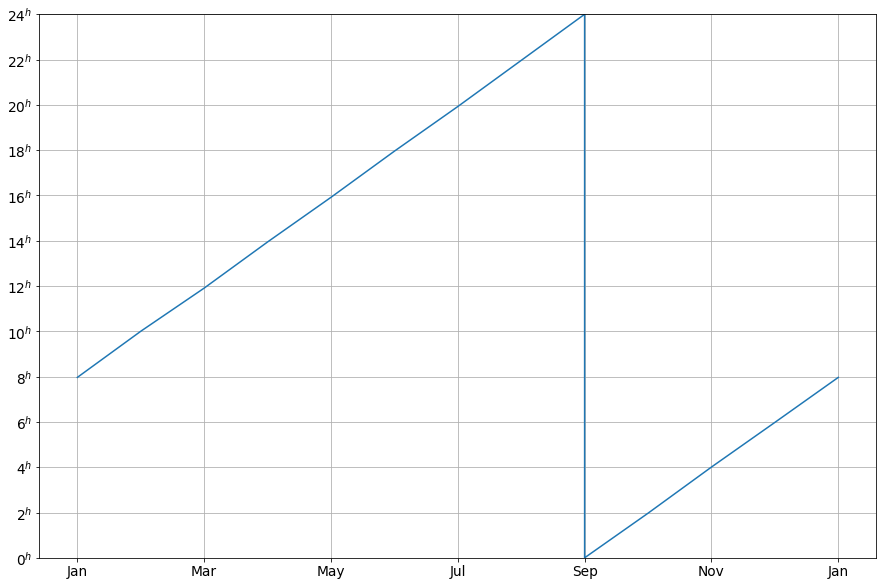

In [4]:
#Setting up the observer
JB = ephem.Observer() 
JB.lat = '53:14:10'
JB.lon = '-02:18:26'
JB.elevation = 0.0

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
h_number = np.zeros((14,),dtype=float)

#Calculating the lst at differnt times of the year
for k in range(1,14):
    if k < 10:
       JB.date = '2016/'+str(k)+'/22  23:59:59'
       str_sid = str(JB.sidereal_time()).split(":")
       h_number[k-1] = float(str_sid[0]) + float(str_sid[1])/60. + float(str_sid[2])/3600.
    elif k > 10:
       JB.date = '2016/'+str(k-1)+'/22  23:59:59'
       str_sid = str(JB.sidereal_time()).split(":")
       h_number[k-1] = float(str_sid[0]) + float(str_sid[1])/60. + float(str_sid[2])/3600 

#Plot
matplotlib.rcParams.update({'font.size': 13.75})

fig, ax = plt.subplots()
h_number[-1] = h_number[0]
x = np.arange(14)
x[9:] = x[9:]-1 

ax.plot(x,h_number)

ax.set_ylim([0,24])

ticks = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.yticks(ticks)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = np.array(["","Jan","Mar","May","Jul","Sep","Nov","Jan"])
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(['$0^h$','$2^h$','$4^h$','$6^h$','$8^h$','$10^h$','$12^h$','$14^h$','$16^h$','$18^h$','$20^h$','$22^h$','$24^h$'])
ax.set_yticklabels(labels)

plt.grid('on')

*Figure 3.2.4*: 2016年，每月22号23:59:59 UTC时刻， Jodrell Bank 天文台的地方恒星时。显然，地方恒星时和UTC之间的差距逐渐增大，直到9月份两者差额归零，这一天正好是太阳直射春分点。The local sidereal time of the Jodrell Bank Observatory at 23:59:59 UTC on the 22nd of each month for 2016. Clearly the difference between the local sidereal time and the UTC time at the observatory steadily increases until somewhere in September when everything resets. The point at which everything resets is actually associated with a physical event. It is when the sun and the verneal equinox allign.

***

Next: [Horizontal Coordinates](3_3_horizontal_coordinates.ipynb)